In [114]:
#Name: Mwanje Musa
#Reg No: MAY22/MSC/1615U
#Programme: MSc. COMP (CS)

In [115]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [116]:
#Import necessary libaries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense

In [117]:
df = pd.read_csv('concrete_data.csv')

In [118]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [119]:
# display the last five records
df.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [120]:
df.shape

(1030, 9)

In [121]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [122]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [123]:
# check if the data is clean
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [124]:
#Separating predictors and target
df_columns = df.columns

predictors = df[df_columns[df_columns != 'Strength']] # all columns except Strength
target = df['Strength'] # Strength column

In [125]:
predictors.head()# check the first five records of predictor

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [126]:
# check the first five records of target feature
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

# Normalization of the Data

In [127]:
predictors_norm = (predictors - predictors.mean()) / predictors.std() # substract  the mean and divide by standard deviation
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [128]:
# number of predictors to be saved in n columns
n_cols = predictors_norm.shape[1]

In [129]:
#Build a Neural Network

def regression_model(): # define regression model
    # create model with three hidden layers, each of 10 hidden units.
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [130]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [131]:
#Take 30% of the data set for Testing the accuracy of the model and 70% for training the model

# import the packages for training, testing and spliting from sklearn
from sklearn.model_selection import train_test_split 


# 30% data set for testing
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=42) 

# Train and Test the Network

In [132]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [133]:
# build the model
model = regression_model()

In [134]:
# fit the model
epochs = 50 # increase the number of epochs to 100
model.fit(X_train, y_train, epochs=epochs, verbose=1)

Epoch 1/50
23/23 [==============================] - 0s 2ms/step - loss: 1585.1111
Epoch 2/50
23/23 [==============================] - 0s 905us/step - loss: 1558.5500
Epoch 3/50
23/23 [==============================] - 0s 910us/step - loss: 1529.0775
Epoch 4/50
23/23 [==============================] - 0s 821us/step - loss: 1489.2307
Epoch 5/50
23/23 [==============================] - 0s 697us/step - loss: 1428.1873
Epoch 6/50
23/23 [==============================] - 0s 812us/step - loss: 1330.5288
Epoch 7/50
23/23 [==============================] - 0s 834us/step - loss: 1176.4053
Epoch 8/50
23/23 [==============================] - 0s 686us/step - loss: 955.4476
Epoch 9/50
23/23 [==============================] - 0s 736us/step - loss: 699.0764
Epoch 10/50
23/23 [==============================] - 0s 745us/step - loss: 473.3557
Epoch 11/50
23/23 [==============================] - 0s 727us/step - loss: 344.7857
Epoch 12/50
23/23 [==============================] - 0s 766us/step - loss: 286.9

# Assignment : Plot a graph of loss (mse) Vs epoch

In [135]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

/Users/musa-mets/opt/anaconda3/envs/keras_env/lib/python3.10/site-packages/keras/engine/data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


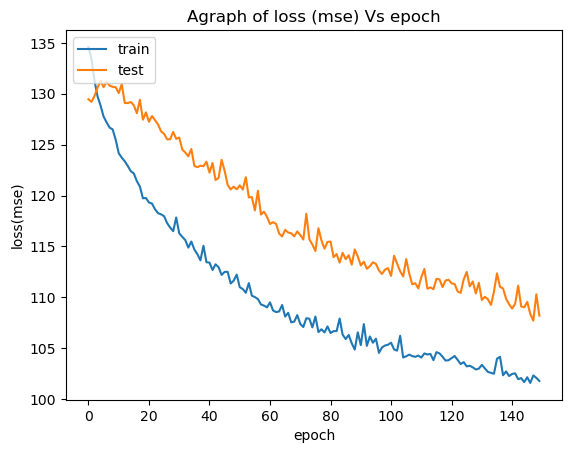

In [136]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Agraph of loss (mse) Vs epoch')
plt.ylabel('loss(mse)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluating the Model

In [137]:
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

10/10 [==============================] - 0s 621us/step


110.4719467163086

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(mean, standard_deviation)

110.47195495497071 0.0


In [140]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 79.99549102783203
10/10 [==============================] - 0s 513us/step
MSE 2: 74.15176391601562
10/10 [==============================] - 0s 580us/step
MSE 3: 49.90969467163086
10/10 [==============================] - 0s 555us/step
MSE 4: 48.433937072753906
10/10 [==============================] - 0s 510us/step
MSE 5: 37.83333206176758
10/10 [==============================] - 0s 530us/step
MSE 6: 36.17537307739258
10/10 [==============================] - 0s 540us/step
MSE 7: 37.42500686645508
10/10 [==============================] - 0s 512us/step
MSE 8: 29.732004165649414
10/10 [==============================] - 0s 504us/step
MSE 9: 31.199193954467773
10/10 [==============================] - 0s 448us/step
MSE 10: 29.09520149230957
10/10 [==============================] - 0s 515us/step
MSE 11: 27.570201873779297
10/10 [==============================] - 0s 453us/step
MSE 12: 25.364492416381836
10/10 [==============================] - 0s 435us/step
MSE 13: 30.38156509399414
10/10 

In [141]:
from sklearn.metrics import r2_score

In [142]:
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

R2-score: 0.91
